<a href="https://colab.research.google.com/github/ruoroj/regressionweek2/blob/main/Copy_of_Python_Programming_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Lasso Regression

## Examples

### Example 1

In [1]:
# Example 1
# ---
# This is a simple implementation of the lasso regression
# ---
#

# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading our dataset
# 
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
# Fitting Lasso Regression
# The hyperparameter, α, lets us control how much we penalize the coefficients, 
# with higher values of α creating simpler modelers. The ideal value of α
# should be tuned like any other hyperparameter. In scikit-learn, α
# is set using the alpha parameter.
# 

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.5)

# Fitting the linear regression
model = regr.fit(X_std, y)


### Example 2

In [5]:
# Example 2
# ---
# Predicting the price using the available attributes while performing lasso regression.
# ---
# Dataset url = http://bit.ly/DiamondsDataset
# ---
# 

In [6]:
# Import libraries
# 
import numpy as np
import pandas as pd

In [7]:
# Uploading the dataset
#
diamonds = pd.read_csv('http://bit.ly/DiamondsDataset')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# Droping the index
#
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Printing unique values of text features
# 
print(diamonds.cut.unique())
print(diamonds.clarity.unique())
print(diamonds.color.unique())

# As we can see, there are a finite number of variables, so we can transform these categorical variables to numerical variables.

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [10]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# Converting the variables to numerical
#
for i in range(3):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.8850606039595762
lasso MSE: 1829298.9194159876
lasso coef: [ 5159.45245224  -217.84225841  -207.20956411 -1250.0126333
    16.16031486    -0.           496.17780105    72.11296318
  -451.28351376]


In [13]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 1.8000000000000003}
lasso score: 0.8864028207282029
linear score: 0.8859249267960946
lasso MSE: 1804825.7372966239
linear MSE: 1812418.4898094584
lasso best estimator coef: [ 5081.13719385  -206.74219417  -206.76740591 -1189.71741405
    34.20443271    -0.           501.07193561    73.6968175
  -456.5137409 ]
linear coef: [[ 5155.92874335  -208.70209498  -208.16287626 -1439.0942139
    243.82503796   -28.79983655   501.31962765    73.93030707
   -459.94636759]]


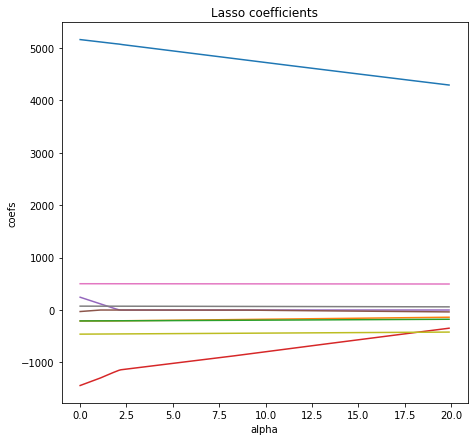

In [14]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

## <font color="green">Challenges</font>

### <font color="green">Challenge 1</font>

In [22]:
# Challenge 1
# ---
# Question: Predict house sales prices for King County given the following dataset applying lasso regression.
# ---
# Dataset 
url = "http://bit.ly/KCHouseDataset"
# ---
# 
house = pd.read_csv(url, parse_dates=True)
house.drop(['lat','long', 'date', 'id'],1, inplace=True)
# Split inot X and y
X = house.drop('price',1)
y = house['price']



In [23]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.653732585354543
lasso MSE: 46668586324.3374
lasso coef: [-3.65794745e+04  3.52203551e+04  2.70264442e+05 -8.24753596e+01
  1.45879869e+04  5.00937812e+04  3.31712599e+04  1.26445028e+04
  1.40767634e+05 -1.10557264e+05 -5.62681040e+04 -1.05010625e+05
  4.06082258e+03 -3.67951552e+02  1.69497796e+04 -1.50463097e+04]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6570456880123683
linear score: 0.6570726006180944
lasso MSE: 48217988995.85821
linear MSE: 48214205192.356125
lasso best estimator coef: [ -35253.78901298   32995.303289    211408.01028645   -2721.39860376
   12294.82532118   48167.28664289   33495.17736202   13979.9515813
  146441.07997925  -64004.45077962  -33697.32222294 -100992.99619122
    2087.42355367    1060.27247149   19918.55674738  -12592.97172292]
linear coef: [-3.52169274e+04  3.30254341e+04  1.54046784e+18 -2.72051727e+03
  1.28178677e+04  4.81220312e+04  3.33259338e+04  1.36233260e+04
  1.46318214e+05 -1.38892718e+18 -7.42315182e+17 -1.00788289e+05
  2.00910117e+03  1.61392161e+03  2.03101575e+04 -1.26272694e+04]


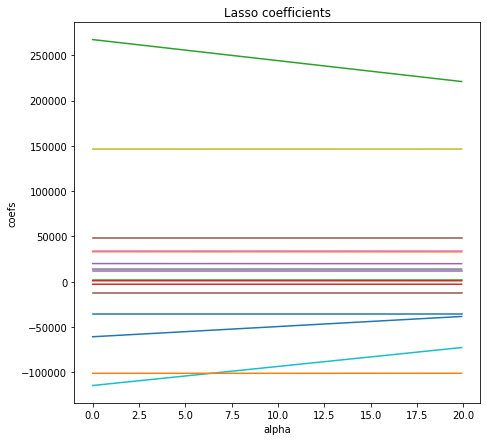

In [26]:
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

### <font color="green">Challenge 2</font>

In [ ]:
# Challenge 2
# ---
# Question: Build a regression model to predict sales prices given the following house prices dataset.
# ---
# Dataset source = http://bit.ly/HousePricesDataset
# ---
# 
OUR CODE GOES HERE

### <font color="green">Challenge 3</font>

In [ ]:
# Challenge 3
# ---
# Question: Given the following dataset, build a regression model to predict sales.
# ---
# Dataset url = http://bit.ly/AdvertisingDataset
# ---
#
OUR CODE GOES HERE

### <font color="green">Challenge 4</font>

In [ ]:
# Challenge 4
# ---
# Question: Build a model to predict time (in seconds) that a car spends on the test bench given a dataset 
# that contains an anonymized set of variables, each representing a custom feature in a Mercedes car.
# ---
# Dataset url = http://bit.ly/MercedesDataset
# ---
# 
OUR CODE GOES HERE

### <font color="green">Challenge 5</font>

In [ ]:
# Challenge 5
# ---
# Question: Predict the burned area of forest fires, in the northeast region of Portugal, 
# by using meteorological and other data.
# ---
# Dataset url = http://bit.ly/ForestFiresDatasetSource
# 
OUR CODE GOES HERE